In [35]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [36]:
variants = [
    "no_trans",
    "official",
    "train_subset",
    "train_no_shed",
    "train_drop",
    "train_drop_no_shed",
    "train_no_head",
    "train_drop_no_aug",
]
data = {}
for v in variants:
    with open(v + ".p", "rb") as handle:
        b = pickle.load(handle)
    data[v] = b


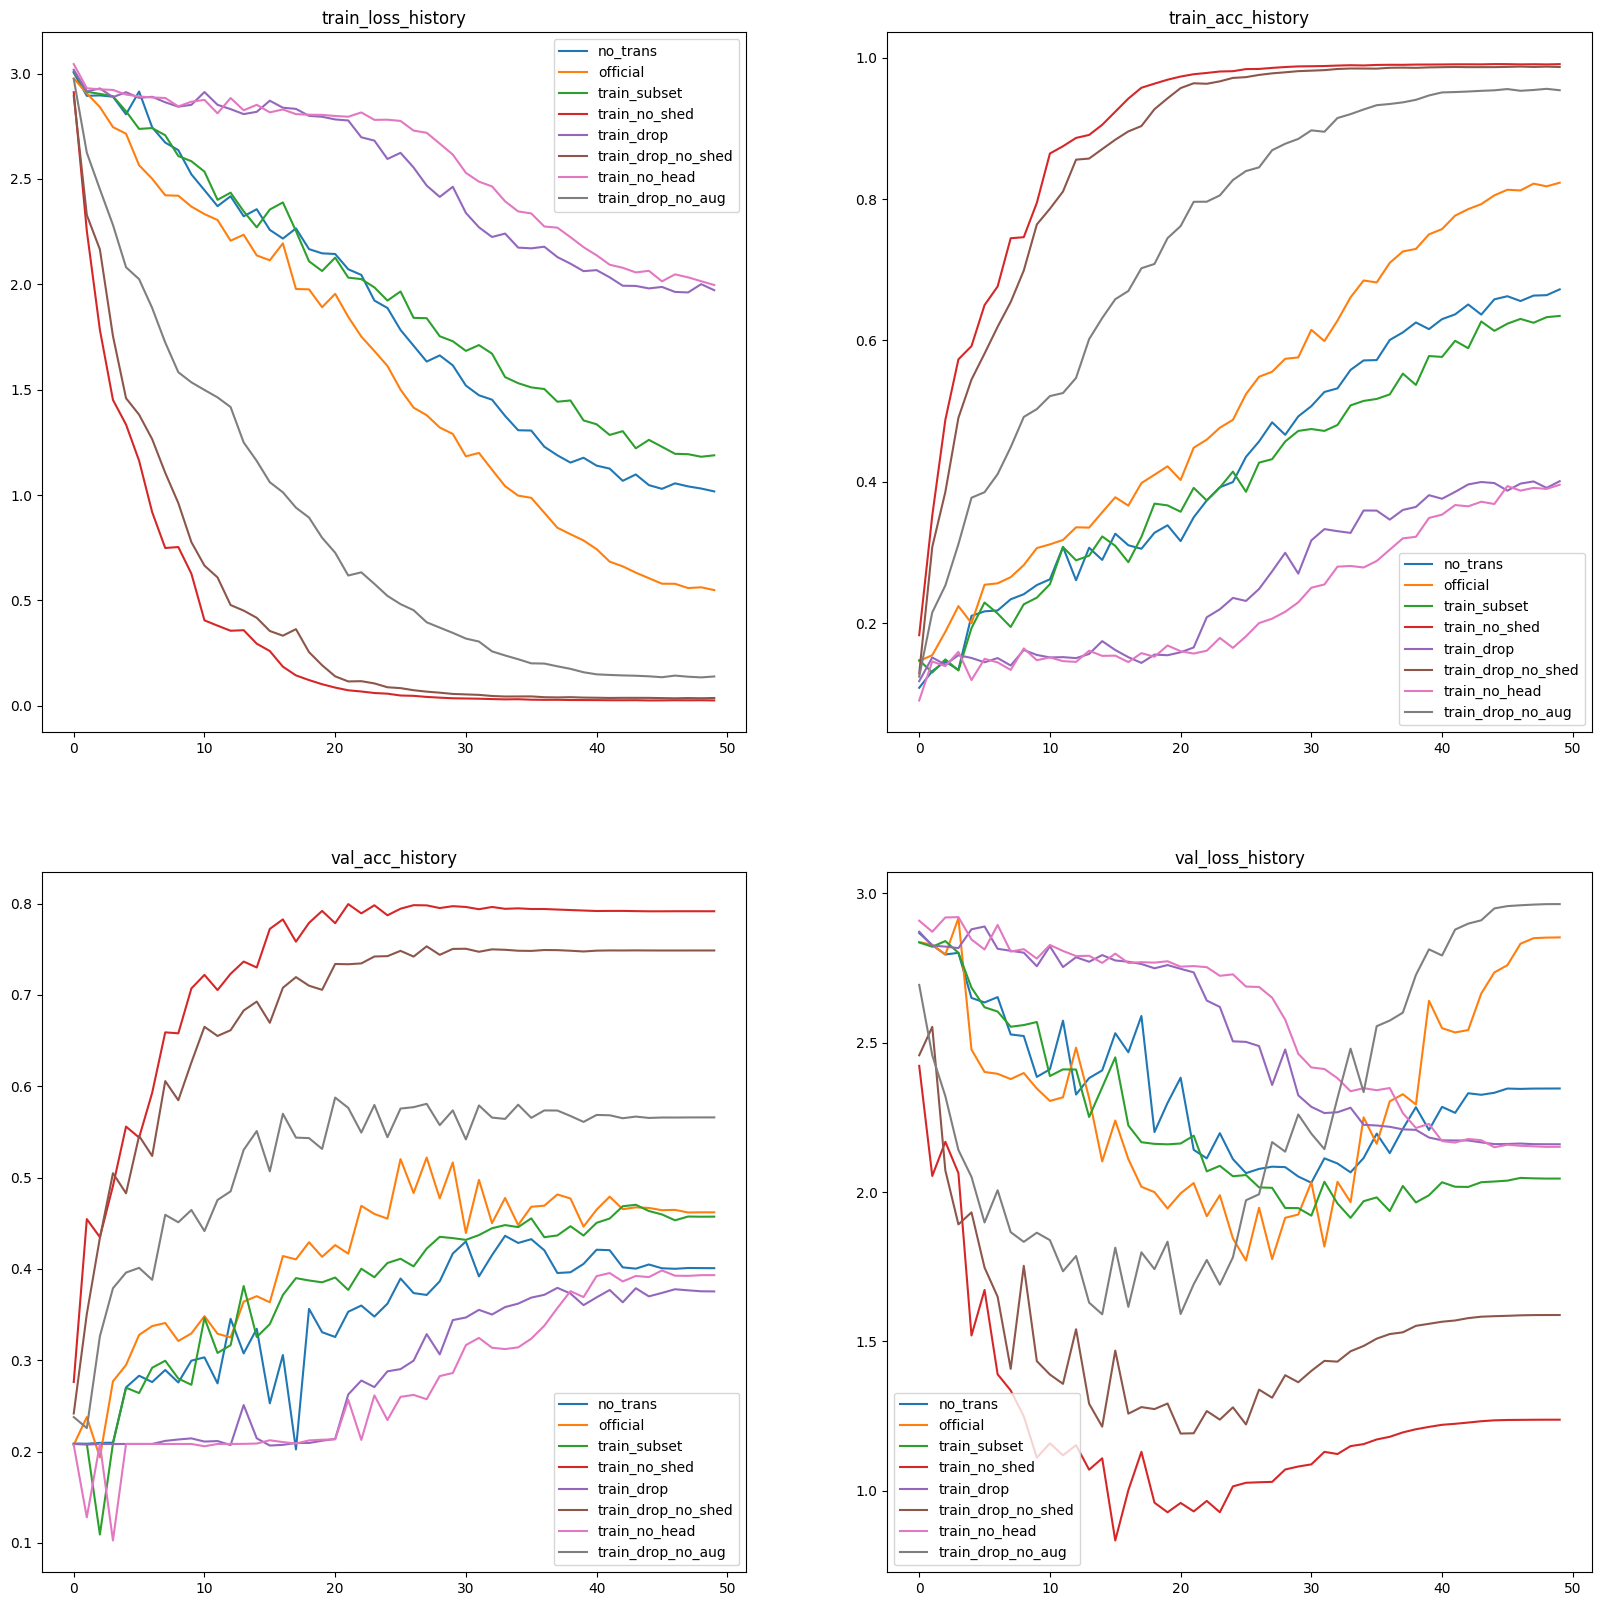

In [38]:
keys = list(list(data.values())[0].keys())
y = np.arange(50)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i, name in enumerate(keys):
    ax = axes.flatten()[i]
    for k, v in data.items():
        ax.plot(y, v[name], label=k)
    ax.legend()
    ax.set_title(name)
